<a href="https://colab.research.google.com/github/karsha19/DiseasePredictor/blob/main/DiseasePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to start everything from starting,, if you are working on it the another day...

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'    {"username":"rakshaadhikari","key":"3ff4b607f955d29ae1dd2d2c1b894cb2"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [6]:
import pandas as pd
df=pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [7]:
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [9]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [10]:
numeric_cols=df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

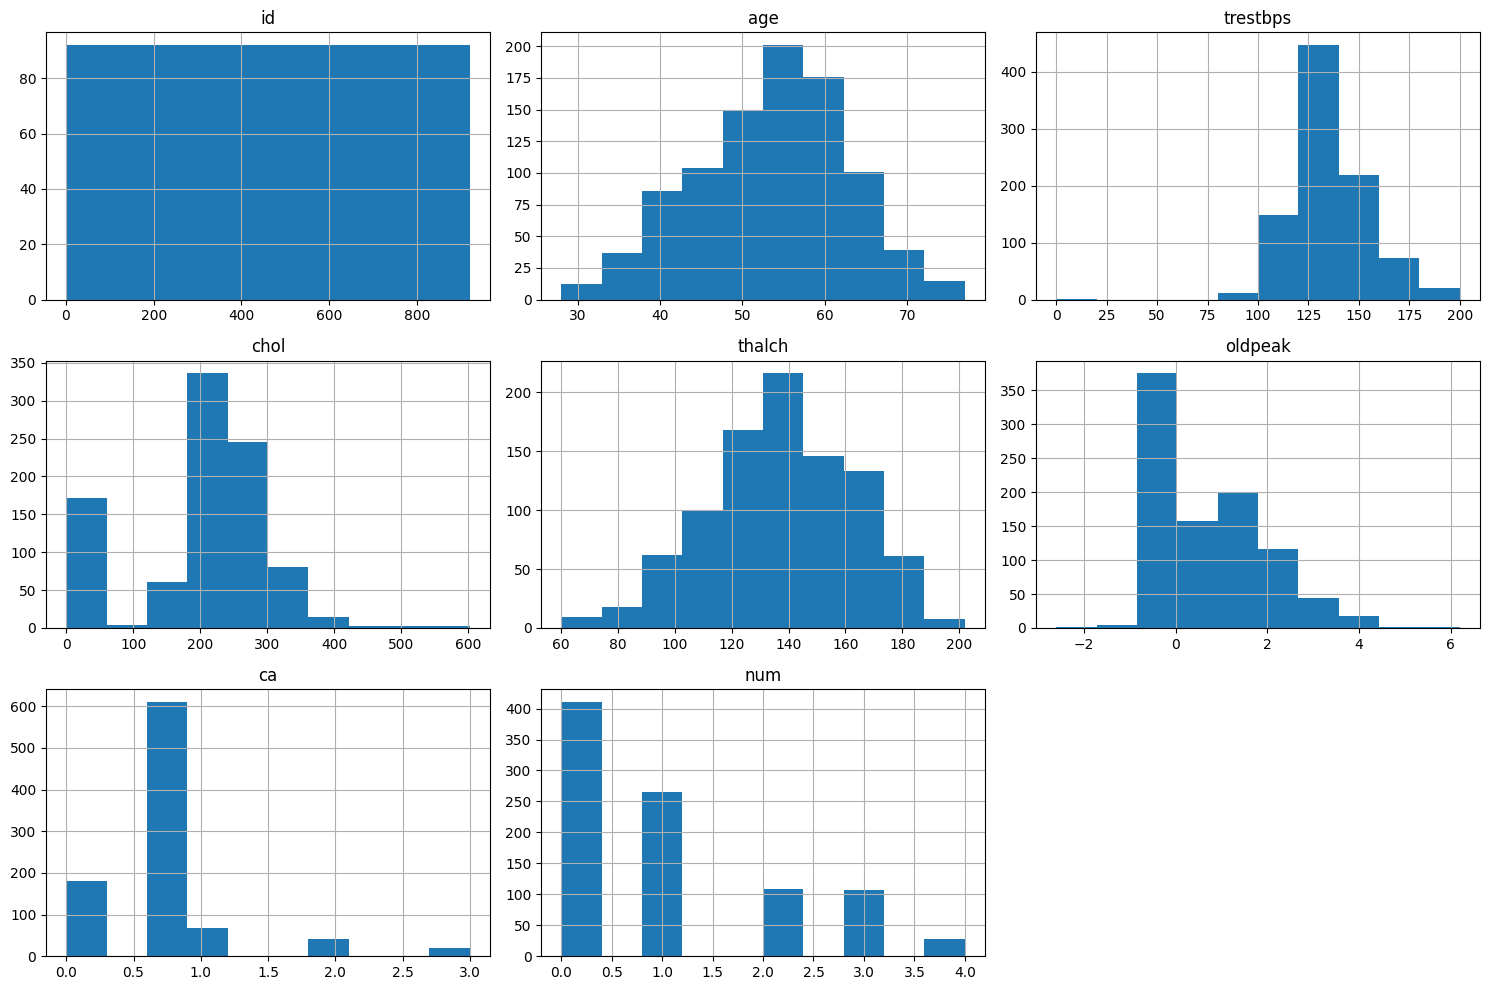

In [14]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

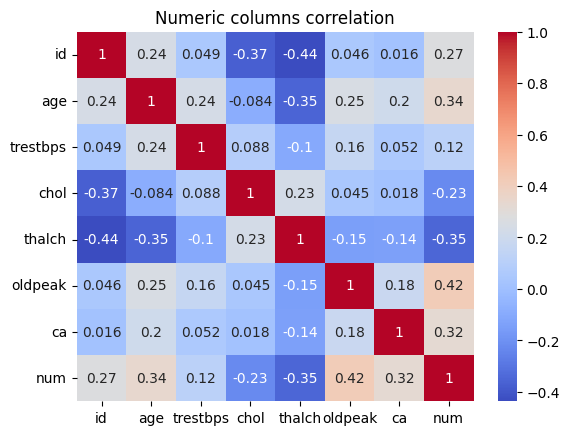

In [15]:
sns.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title("Numeric columns correlation")
plt.show()

In [16]:
cat_cols= df.select_dtypes(include="object").columns.tolist() #one-hot-encode
if 'num' in cat_cols:
    cat_cols.remove('num') #dont encode the target column,,,, #numeric values will be removed from here , earlier we changed the numeric values, now we are changing the string values by removing the num values...

In [17]:
X=df.drop('num',axis=1)
y=(df['num']>0).astype(int)  #0 as  no disease , 1 as disease present.

In [18]:
X=pd.get_dummies(X,columns=cat_cols) #here, we are converting the strings into the numeric values,, to make the machine understand...
print("Final feature columns: ",X.columns)


Final feature columns:  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [19]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=40);

In [20]:
scaler= StandardScaler();
X_train_scaled=scaler.fit_transform(X_train);
X_test_scaled=scaler.transform(X_test);

In [21]:
from sklearn.linear_model import LogisticRegression;
lr_model=LogisticRegression(); #giving admission to  a new student.
lr_model.fit(X_train_scaled,y_train); #training step.

In [22]:
from sklearn.metrics import accuracy_score,classification_report;
y_pred_lr=lr_model.predict(X_test_scaled); #if the patient in the test, has heart disease or not...
print("Logistic Regression accuracy: ",accuracy_score(y_test,y_pred_lr)); #here, we are comparing the original answer and model answer.
print(classification_report(y_test,y_pred_lr));

Logistic Regression accuracy:  0.8641304347826086
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        83
           1       0.86      0.90      0.88       101

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



The accuracy is more than 80% here..

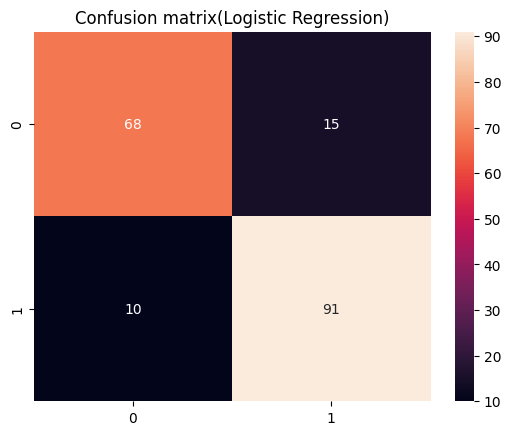

In [23]:
from sklearn.metrics import confusion_matrix;
cm=confusion_matrix(y_test,y_pred_lr);
sns.heatmap(cm,annot=True, fmt='d');
plt.title('Confusion matrix(Logistic Regression)');
plt.show();

In [24]:
from sklearn.ensemble import RandomForestClassifier;
rf_model=RandomForestClassifier(n_estimators=100,random_state=41);
rf_model.fit(X_train_scaled,y_train);
y_pred_rf=rf_model.predict(X_test_scaled); #here, we are storing the xtestscaled
print("Random Forest Accuracy: ",accuracy_score(y_test,y_pred_rf));

Random Forest Accuracy:  0.8858695652173914


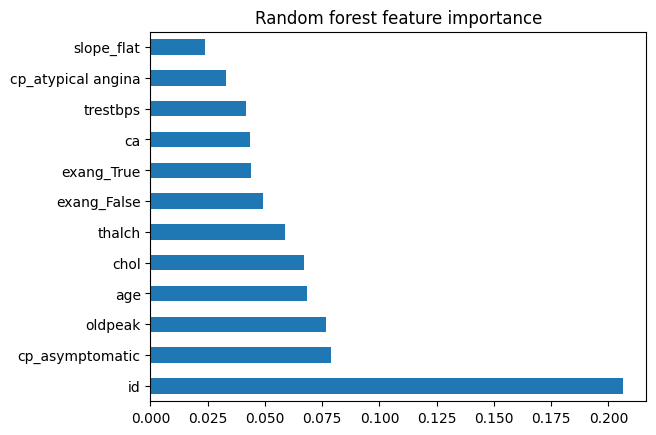

In [25]:
feat_imp=pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh')
plt.title("Random forest feature importance")
plt.show()

In [26]:
import joblib #to load the pklfile...
joblib.dump(rf_model,'heart_rf_model.pkl');
joblib.dump(scaler,'heart_scaler.pkl');

In [27]:
sample=X.head(1)
sample.to_csv('Heart_user_csv') #index is set to false, which means the rows and cols will show up only..


In [28]:
from google.colab import files
files.upload()


Saving Heart_user_csv to Heart_user_csv (1)


{'Heart_user_csv (1)': b',id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect\n0,1,63,145.0,233.0,150.0,2.3,0.0,False,True,True,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False\n'}

In [32]:
import joblib
import pandas as pd
user_df=pd.read_csv('Heart_user_csv');

numeric_cols=df.select_dtypes(include='number').columns.tolist();
cat_cols=df.select_dtypes(include='object').columns.tolist();
bool_cols=df.select_dtypes(include='bool').columns.tolist();

numeric_cols=[cols for cols in numeric_cols if cols in user_df.columns];
cat_cols=[cols for cols in cat_cols if cols in user_df.columns];
bool_cols=[cols for cols in bool_cols if cols in user_df.columns];

user_df[numeric_cols]=user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col]=user_df[col].fillna('Unknown');

for col in bool_cols:
  user_df[col]=user_df[col].astype(int);

user_df_encoded=pd.get_dummies(user_df,columns=cat_cols);

#alignthe columns
user_df_encoded=user_df_encoded.reindex(columns=X.columns,fill_value=0)

#scaling the data
scaler=joblib.load('heart_scaler.pkl');
user_df_scaled=scaler.transform(user_df_encoded);


#we aare doing the prediction
model=joblib.load('heart_rf_model.pkl');
predictions=model.predict(user_df_scaled);
user_df['Heart disease prediction'] = predictions;


#now, here we are showing the result
print(user_df);

   Unnamed: 0  id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  \
0           0   1   63     145.0  233.0   150.0      2.3  0.0       False   

   sex_Male  ...  restecg_st-t abnormality  exang_False  exang_True  \
0      True  ...                     False         True       False   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0               True       False            False               True   

   thal_normal  thal_reversable defect  Heart disease prediction  
0        False                   False                         0  

[1 rows x 32 columns]
